In [258]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Loading dataset and checking whether it is imported**

In [259]:
df = pd.read_csv('../2_regression/datasets/diabetes.csv')
pd.set_option('display.max_columns', None)
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


**checking different information about diabetes data ie. datatypes, non-null counts**

In [260]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [261]:
from sklearn.preprocessing import LabelEncoder

# Apply label encoding to categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
    
    
df.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
730,3,130,78,23,79,28.4,0.323,34,1
222,7,119,0,0,0,25.2,0.209,37,0
687,1,107,50,19,0,28.3,0.181,29,0
258,1,193,50,16,375,25.9,0.655,24,0
99,1,122,90,51,220,49.7,0.325,31,1


**Feature Scaling**

In [262]:
from sklearn.preprocessing import StandardScaler


# seperate feature and target variables
X = df.drop(columns=['Outcome'])
y = df['Outcome']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


**Split data into training and testing sets**

In [263]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

**train the logistic model**

In [264]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, y_train)

LogisticRegression()

In [265]:
y_pred = model.predict(X_test)

In [266]:
print(y_pred[:35])
print(y_test.values[:35])

[0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1]
[0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1 0]


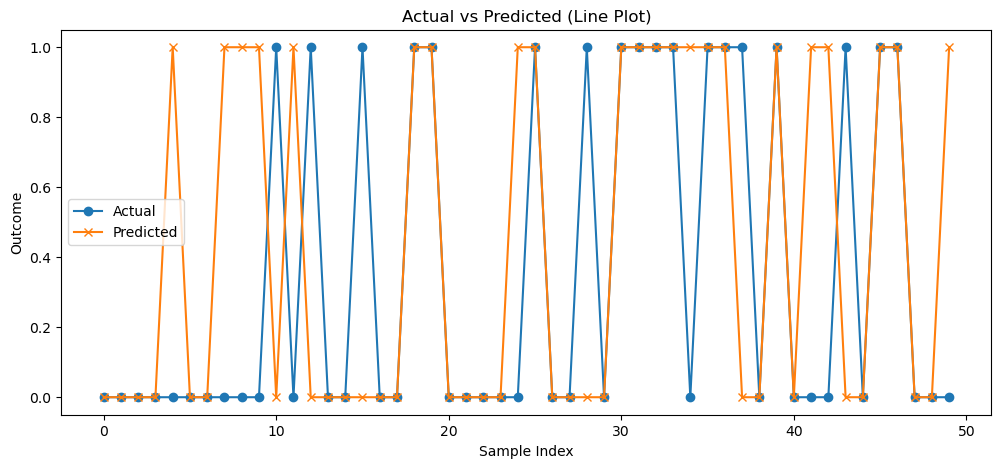

In [272]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

plt.plot(y_test.values[:50], label='Actual', marker='o')
plt.plot(y_pred[:50], label='Predicted', marker='x')

plt.xlabel('Sample Index')
plt.ylabel('Outcome')
plt.title('Actual vs Predicted (Line Plot)')
plt.legend()

plt.show()

**Model Evaluation**

In [273]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

**Accuracy**

In [274]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.74


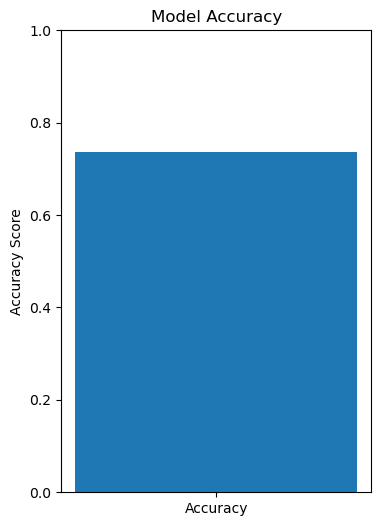

In [291]:
plt.figure(figsize=(4,6))
plt.bar(["Accuracy"], [accuracy])
plt.ylim(0,1)
plt.title("Model Accuracy")
plt.ylabel("Accuracy Score")
plt.show()

**Classification report**


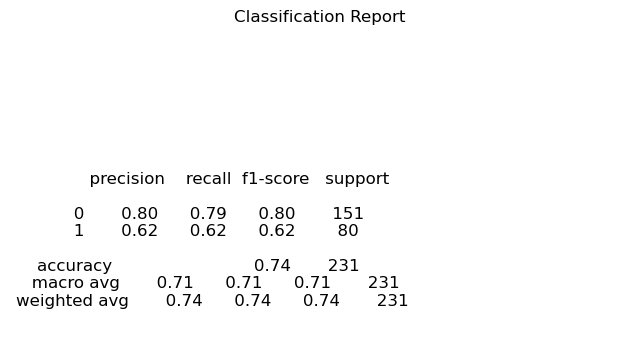

In [290]:
report = classification_report(y_test, y_pred)

plt.figure(figsize=(8,4))
plt.text(0.01, 0.05, report, fontsize=12)
plt.title("Classification Report")
plt.axis('off')
plt.show()

**Confusion Matrix**

In [281]:
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix --- ")
print(cm)

Confusion Matrix --- 
[[120  31]
 [ 30  50]]


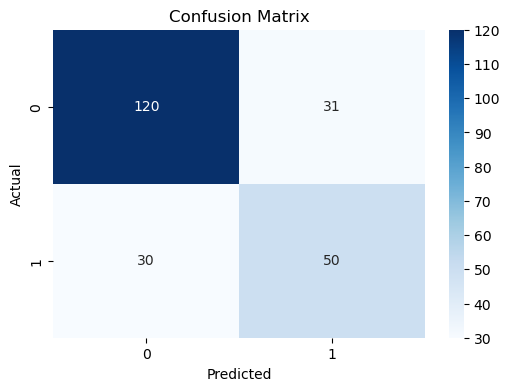

In [287]:

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()